In [2]:
import yfinance as yf
import pandas as pd
import sklearn as sk
import numpy as np

In [3]:
sp500 = yf.Ticker('^GSPC')

In [4]:
sp500 = sp500.history(period='max')

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-03-06 00:00:00-05:00,5785.870117,5812.080078,5711.640137,5738.520020,5165080000,0.0,0.0
2025-03-07 00:00:00-05:00,5726.009766,5783.009766,5666.290039,5770.200195,5705140000,0.0,0.0
2025-03-10 00:00:00-04:00,5705.370117,5705.370117,5564.020020,5614.560059,6409370000,0.0,0.0


In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2025-02-27 00:00:00-05:00', '2025-02-28 00:00:00-05:00',
               '2025-03-03 00:00:00-05:00', '2025-03-04 00:00:00-05:00',
               '2025-03-05 00:00:00-05:00', '2025-03-06 00:00:00-05:00',
               '2025-03-07 00:00:00-05:00', '2025-03-10 00:00:00-04:00',
               '2025-03-11 00:00:00-04:00', '2025-03-12 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24414, freq=None)

<Axes: xlabel='Date'>

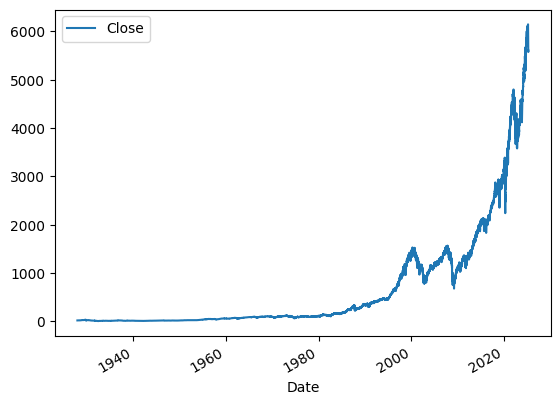

In [7]:
sp500.plot.line(y='Close', use_index=True)

In [8]:
del sp500['Dividends']
del sp500['Stock Splits']

In [9]:
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2025-03-06 00:00:00-05:00,5785.870117,5812.080078,5711.640137,5738.520020,5165080000,5770.200195
2025-03-07 00:00:00-05:00,5726.009766,5783.009766,5666.290039,5770.200195,5705140000,5614.560059
2025-03-10 00:00:00-04:00,5705.370117,5705.370117,5564.020020,5614.560059,6409370000,5572.069824


In [11]:
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2025-03-06 00:00:00-05:00,5785.870117,5812.080078,5711.640137,5738.520020,5165080000,5770.200195,1
2025-03-07 00:00:00-05:00,5726.009766,5783.009766,5666.290039,5770.200195,5705140000,5614.560059,0
2025-03-10 00:00:00-04:00,5705.370117,5705.370117,5564.020020,5614.560059,6409370000,5572.069824,0


In [13]:
sp500 = sp500.loc['1990-01-01':].copy()

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-03-06 00:00:00-05:00,5785.870117,5812.080078,5711.640137,5738.520020,5165080000,5770.200195,1
2025-03-07 00:00:00-05:00,5726.009766,5783.009766,5666.290039,5770.200195,5705140000,5614.560059,0
2025-03-10 00:00:00-04:00,5705.370117,5705.370117,5564.020020,5614.560059,6409370000,5572.069824,0


In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Close','Volume','Open','High','Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, n_estimators=1000, random_state=1)

In [16]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [17]:
preds = pd.Series(preds, index=test.index)

In [18]:
precision_score(test['Target'], preds)

0.5301204819277109

In [19]:
combined = pd.concat([test['Target'], preds], axis=1)

<Axes: xlabel='Date'>

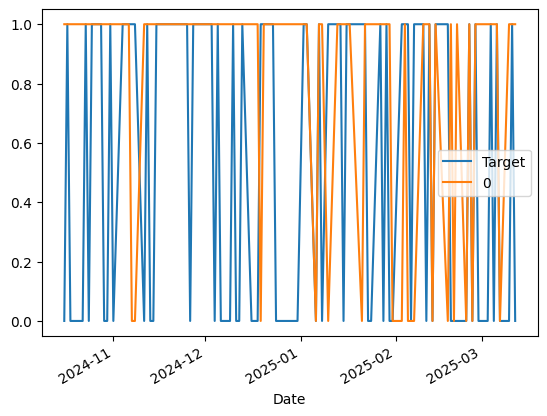

In [20]:
combined.plot()

In [21]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [22]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions =[]
    
    for i in range(start, data.shape[0],step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [23]:
predictions = backtest(sp500, model, predictors)

In [24]:
predictions['Predictions'].value_counts()

Predictions
0    3703
1    2661
Name: count, dtype: int64

In [25]:
precision_score( predictions['Target'], predictions['Predictions'])

0.5313791807591132

In [26]:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.535827
0    0.464173
Name: count, dtype: float64

In [27]:
horizons = [2,5,60,250,1000] # horizons on which we want to look at rolling means.
new_predictors = []

for horizon in horizons: # this is going to look at the past 5 days and find the sum of the target.
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f'Close_Ratio_[horizon]'
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']
    
    trend_column = f'Trend_{horizon}'
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']
    
    new_predictors += [ratio_column, trend_column]

In [28]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_[horizon],Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,NaN,0.0,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,NaN,0.0,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-06 00:00:00-05:00,5785.870117,5812.080078,5711.640137,5738.520020,5165080000,5770.200195,1,1.242788,1.0,2.0,29.0,140.0,527.0
2025-03-07 00:00:00-05:00,5726.009766,5783.009766,5666.290039,5770.200195,5705140000,5614.560059,0,1.249162,1.0,2.0,29.0,140.0,527.0
2025-03-10 00:00:00-04:00,5705.370117,5705.370117,5564.020020,5614.560059,6409370000,5572.069824,0,1.215034,1.0,2.0,29.0,140.0,527.0


In [29]:
sp500 = sp500.dropna() # drop na

In [30]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_[horizon],Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,1.176082,1.0,1.0,32.0,127.0,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,1.172676,0.0,1.0,32.0,126.0,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.176163,1.0,2.0,32.0,127.0,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.183537,2.0,3.0,32.0,128.0,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,1.181856,1.0,2.0,32.0,128.0,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-05 00:00:00-05:00,5781.359863,5860.589844,5742.350098,5842.629883,5285970000,5738.520020,0,1.265828,1.0,2.0,29.0,141.0,528.0
2025-03-06 00:00:00-05:00,5785.870117,5812.080078,5711.640137,5738.520020,5165080000,5770.200195,1,1.242788,1.0,2.0,29.0,140.0,527.0
2025-03-07 00:00:00-05:00,5726.009766,5783.009766,5666.290039,5770.200195,5705140000,5614.560059,0,1.249162,1.0,2.0,29.0,140.0,527.0


In [31]:
model = RandomForestClassifier(n_estimators=1200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model): 
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors]) [:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [37]:
predictions = backtest(sp500, model, new_predictors)

In [38]:
predictions['Predictions'].value_counts()

Predictions
0.0    4347
1.0    1016
Name: count, dtype: int64

In [39]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5541338582677166